In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df =df.drop(columns=['PassengerId','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked'])
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,NaN,23.4500
889,1,1,26.0,30.0000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [7]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1),
                                                    df['Survived'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((623, 3), (268, 3))

# Standard Scaler

In [9]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

scaler.fit(X_train)

X_train_scaled =scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
scaler.mean_

array([ 2.28731942, 29.54333868, 32.45827255])

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [12]:
np.round(X_train.describe(), 1)

,Pclass,Age,Fare
count,623.0,623.0,623.0
mean,2.3,29.5,32.5
std,0.8,13.0,48.3
min,1.0,0.7,0.0
25%,1.5,23.0,7.9
50%,3.0,28.0,15.0
75%,3.0,36.0,31.4
max,3.0,80.0,512.3


In [13]:
np.round(X_train_scaled.describe(), 1)

,Pclass,Age,Fare
count,623.0,623.0,623.0
mean,0.0,0.0,0.0
std,1.0,1.0,1.0
min,-1.5,-2.2,-0.7
25%,-0.9,-0.5,-0.5
50%,0.8,-0.1,-0.4
75%,0.8,0.5,-0.0
max,0.8,3.9,10.0


# Visualization before and after Scaling

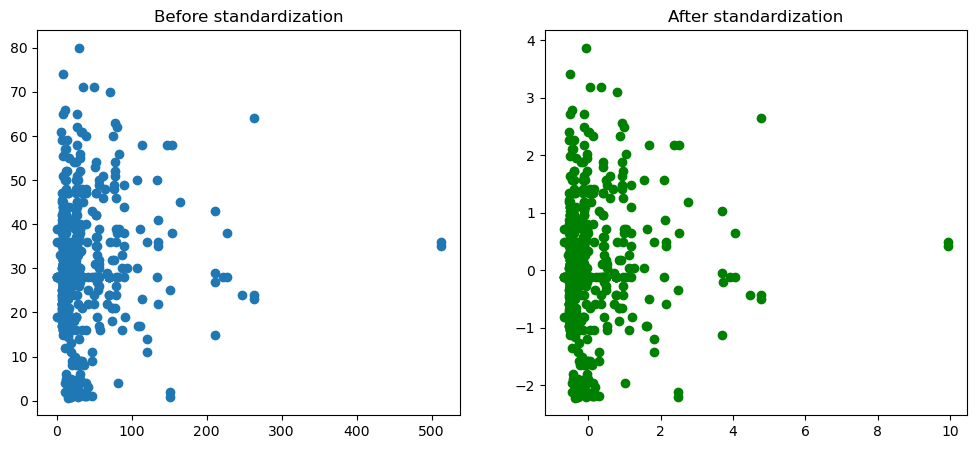

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before standardization 
ax1.scatter(X_train['Fare'], X_train['Age'])
ax1.set_title("Before standardization")

# after standardization
ax2.scatter(X_train_scaled['Fare'], X_train_scaled['Age'],color='green')
ax2.set_title("After standardization")
plt.show()

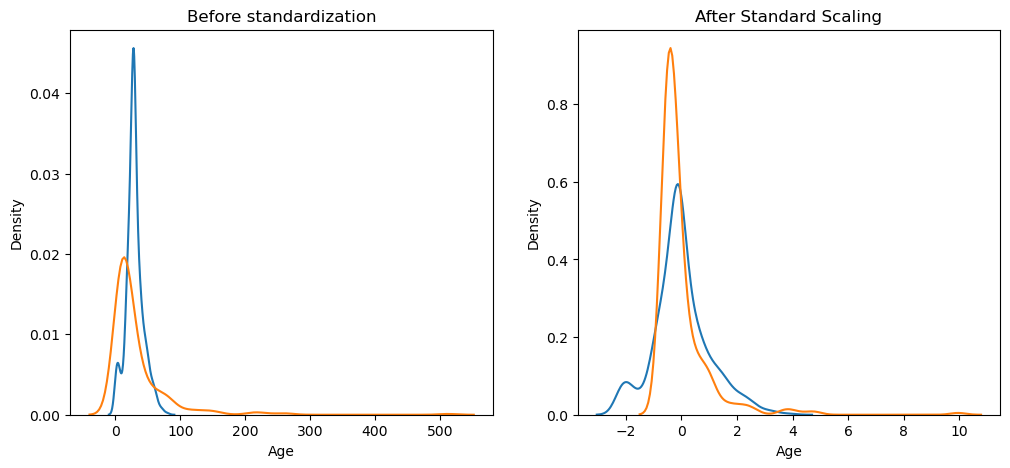

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before standardization 
ax1.set_title('Before standardization')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['Fare'], ax=ax1)

# after standardization
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['Fare'], ax=ax2)
plt.show()

Standard Deviation of sc_Fare is 1.000803535686101 


C:\Users\Alina\AppData\Local\Temp\ipykernel_12160\4274266845.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled['Fare'])


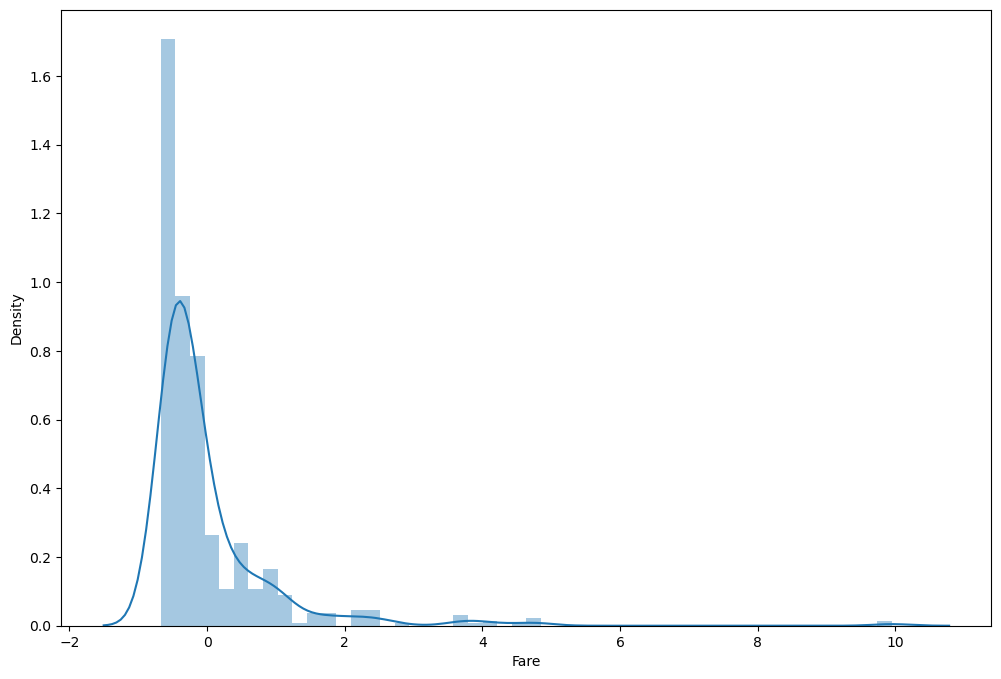

In [16]:

import seaborn as sns
plt.figure(figsize=(12,8))
sns.distplot(X_train_scaled['Fare'])
import statistics
print("Standard Deviation of sc_Fare is % s " 
                % (statistics.stdev(X_train_scaled['Fare'])))

Standard Deviation of sc_Age is 1.000803535686101 


C:\Users\Alina\AppData\Local\Temp\ipykernel_12160\1087971802.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled['Age'])


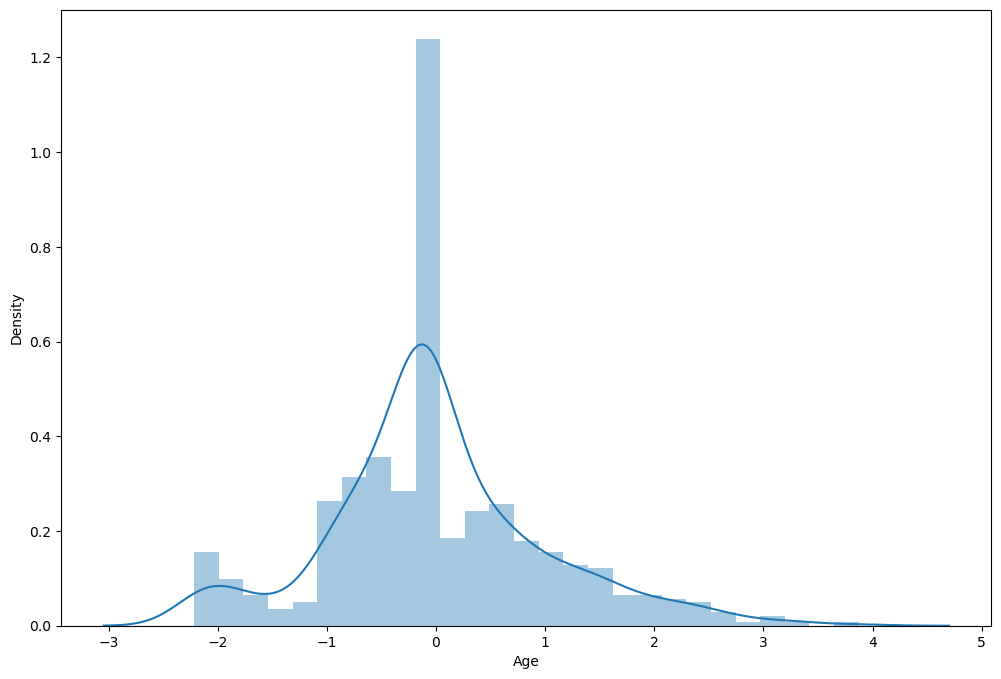

In [17]:
plt.figure(figsize=(12,8))
sns.distplot(X_train_scaled['Age'])
print("Standard Deviation of sc_Age is % s " 
                % (statistics.stdev(X_train_scaled['Age'])))

# Effect of Outlier

In [18]:
df_out = df.append(pd.DataFrame({'Age':[1.00,102.00,98.00],'Fare':[1.2300,300.000,367.000],'Pclass':[1,2,3]}),ignore_index=True)

C:\Users\Alina\AppData\Local\Temp\ipykernel_12160\1195692157.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_out = df.append(pd.DataFrame({'Age':[1.00,102.00,98.00],'Fare':[1.2300,300.000,367.000],'Pclass':[1,2,3]}),ignore_index=True)


In [19]:
df_out.sample(10)

,Survived,Pclass,Age,Fare
25,1.0,3,38.0,31.3875
488,0.0,3,30.0,8.0500
762,1.0,3,20.0,7.2292
164,0.0,3,1.0,39.6875
508,0.0,3,28.0,22.5250
717,1.0,2,27.0,10.5000
769,0.0,3,32.0,8.3625
82,1.0,3,28.0,7.7875
467,0.0,1,56.0,26.5500
163,0.0,3,17.0,8.6625


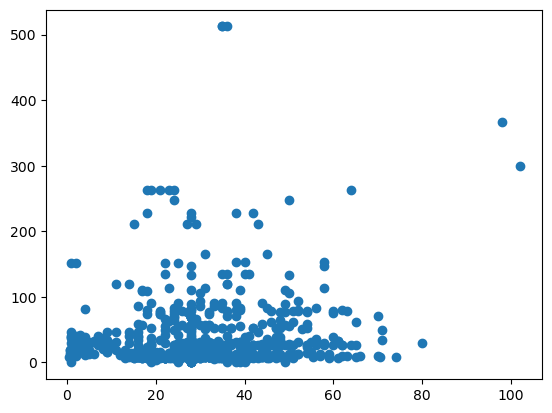

In [20]:
plt.scatter(df_out['Age'], df_out['Fare'])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_out.drop('Survived', axis=1),
                                                    df_out['Survived'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((625, 3), (269, 3))

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled_out = scaler.transform(X_train)
X_test_scaled_out = scaler.transform(X_test)

In [23]:
X_train_scaled_out = pd.DataFrame(X_train_scaled_out, columns=X_train.columns)
X_test_scaled_out = pd.DataFrame(X_test_scaled_out, columns=X_test.columns)

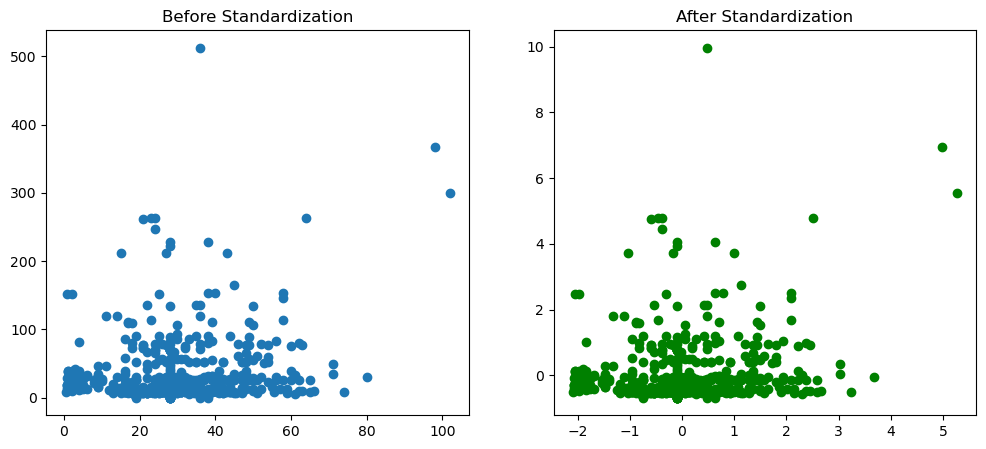

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['Fare'])
ax1.set_title("Before Standardization")
ax2.scatter(X_train_scaled_out['Age'], X_train_scaled_out['Fare'],color='green')
ax2.set_title("After Standardization")
plt.show()
